In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_content(pattern, path="."):
    files = os.listdir(path)
    matches = [x for x in files if pattern in x]
    print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None,
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    [ax.plot(x) for x in lists]
    ax.legend(legend, title=legend_title)
    return ax


In [3]:
prefix_25 = "pl25_model-conv128-fcnn128"
val_losses_25 = get_content(f"{prefix_25}-val_losses")
train_losses_25 = get_content(f"{prefix_25}-train_losses")
val_metrics_25 = get_content(f"{prefix_25}-val_metrics")
train_metrics_25 = get_content(f"{prefix_25}-train_metrics")
duration_25 = get_content(f"{prefix_25}-duration")

prefix_50 = "pl50_model-conv128-fcnn128"
val_losses_50 = get_content(f"{prefix_50}-val_losses")
train_losses_50 = get_content(f"{prefix_50}-train_losses")
val_metrics_50 = get_content(f"{prefix_50}-val_metrics")
train_metrics_50 = get_content(f"{prefix_50}-train_metrics")
duration_50 = get_content(f"{prefix_50}-duration")

prefix_75 = "pl75_model-conv128-fcnn128"
val_losses_75 = get_content(f"{prefix_75}-val_losses")
train_losses_75 = get_content(f"{prefix_75}-train_losses")
val_metrics_75 = get_content(f"{prefix_75}-val_metrics")
train_metrics_75 = get_content(f"{prefix_75}-train_metrics")
duration_75 = get_content(f"{prefix_75}-duration")

val_losses_150 = get_content("val_losses", path="../DEFAULT2")
train_losses_150 = get_content("train_losses", path="../DEFAULT2")
val_metrics_150 = get_content("val_metrics", path="../DEFAULT2")
train_metrics_150 = get_content("train_metrics", path="../DEFAULT2")
duration_150 = get_content("duration", path="../DEFAULT2")

prefix_100 = "pl100_model-conv128-fcnn128"
val_losses_100 = get_content(f"{prefix_100}-val_losses")
train_losses_100 = get_content(f"{prefix_100}-train_losses")
val_metrics_100 = get_content(f"{prefix_100}-val_metrics")
train_metrics_100 = get_content(f"{prefix_100}-train_metrics")
duration_100 = get_content(f"{prefix_100}-duration")

prefix_200 = "pl200_model-conv128-fcnn128"
val_losses_200 = get_content(f"{prefix_200}-val_losses")
train_losses_200 = get_content(f"{prefix_200}-train_losses")
val_metrics_200 = get_content(f"{prefix_200}-val_metrics")
train_metrics_200 = get_content(f"{prefix_200}-train_metrics")
duration_200 = get_content(f"{prefix_200}-duration")

prefix_250 = "pl250_model-conv128-fcnn128"
val_losses_250 = get_content(f"{prefix_250}-val_losses")
train_losses_250 = get_content(f"{prefix_250}-train_losses")
val_metrics_250 = get_content(f"{prefix_250}-val_metrics")
train_metrics_250 = get_content(f"{prefix_250}-train_metrics")
duration_250 = get_content(f"{prefix_250}-duration")

Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl25_model-conv128-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl25_model-conv128-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl25_model-conv128-fcnn128-val_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl25_model-conv128-fcnn128-train_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl25_model-conv128-fcnn128-duration.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl50_model-conv128-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl50_model-conv128-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl50_model-conv128-fcnn128-val_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


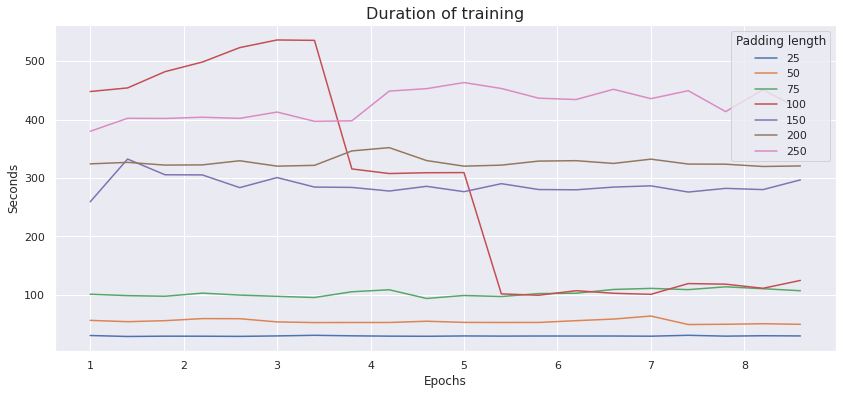

In [4]:
ax = plot_lists([duration_25, 
                duration_50,
                duration_75,
                duration_100, 
                duration_150, 
                duration_200,
                duration_250], legend=[25, 50, 75, 100, 150, 200, 250], legend_title="Padding length")
ax.set_title("Duration of training", fontsize=16)
ax.set_xlabel("Epochs")
ax.set_xticklabels(list(range(len(duration_100))))
_ = ax.set_ylabel("Seconds")

25      29.696923
50      54.423795
75     103.202303
100    285.298940
150    287.671102
200    327.135751
250    425.391229
dtype: float64

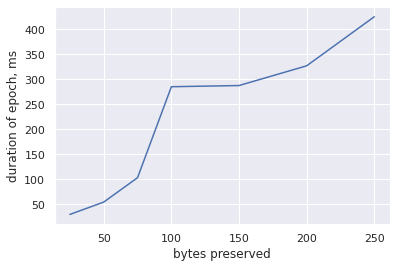

In [5]:
df = pd.DataFrame([duration_25, 
                duration_50,
                duration_75,
                duration_100, 
                duration_150, 
                duration_200,
                duration_250], index=[25, 50, 75, 100, 150, 200, 250])
ax = df.mean(axis=1).plot()
ax.set_ylabel("duration of epoch, ms")
_ = ax.set_xlabel("bytes preserved")
df.mean(axis=1)

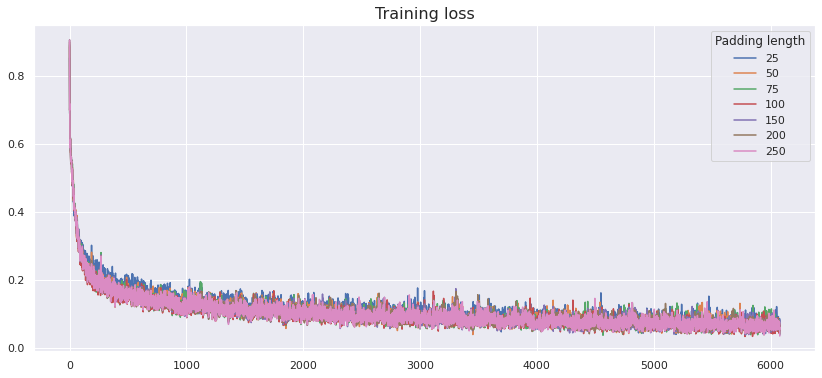

In [6]:
ax = plot_lists([train_losses_25, 
                train_losses_50,
                train_losses_75,
                train_losses_100, 
                train_losses_150, 
                train_losses_200,
                train_losses_250], legend=[25, 50, 75, 100, 150, 200, 250], legend_title="Padding length")
_ = ax.set_title("Training loss", fontsize=16)

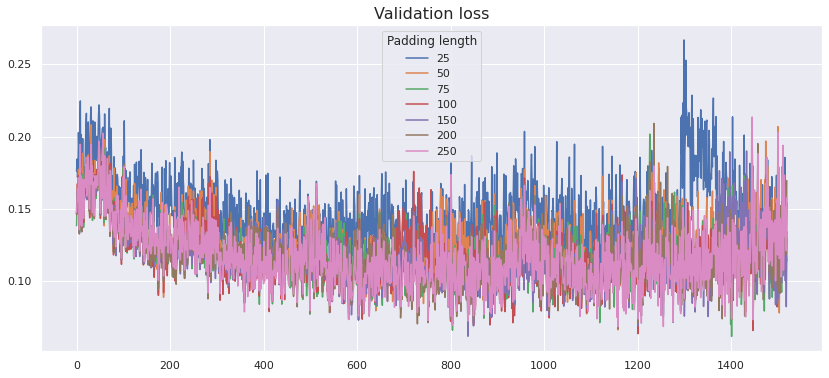

In [7]:
ax = plot_lists([val_losses_25, 
                val_losses_50,
                val_losses_75,
                val_losses_100, 
                val_losses_150, 
                val_losses_200,
                val_losses_250], legend=[25, 50, 75, 100, 150, 200, 250], legend_title="Padding length")
_ = ax.set_title("Validation loss", fontsize=16)

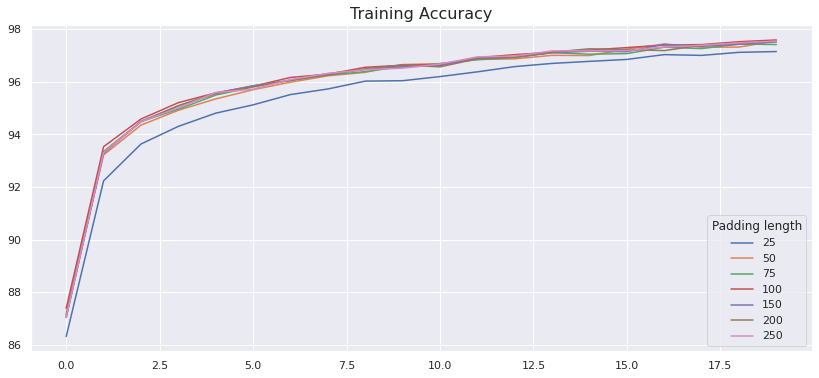

In [8]:
ax = plot_lists([train_metrics_25[:,0], 
                train_metrics_50[:,0],
                train_metrics_75[:,0],
                train_metrics_100[:,0], 
                train_metrics_150[:,0], 
                train_metrics_200[:,0],
                train_metrics_250[:,0]], legend=[25, 50, 75, 100, 150, 200, 250], legend_title="Padding length")
_ = ax.set_title("Training Accuracy", fontsize=16)

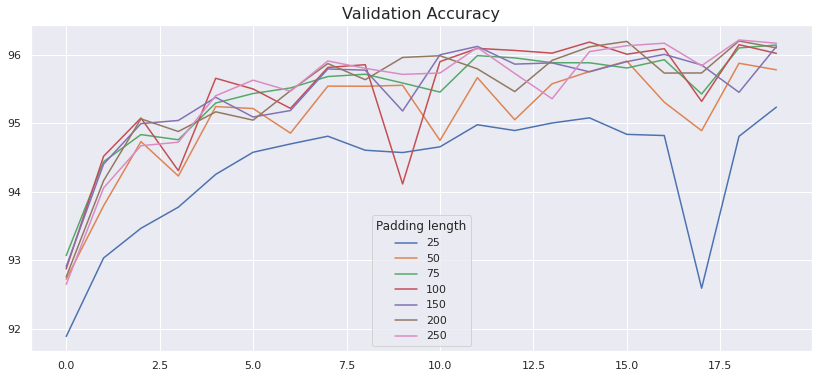

In [9]:
ax = plot_lists([val_metrics_25[:,0], 
                val_metrics_50[:,0],
                val_metrics_75[:,0],
                val_metrics_100[:,0], 
                val_metrics_150[:,0], 
                val_metrics_200[:,0],
                val_metrics_250[:,0]], legend=[25, 50, 75, 100, 150, 200, 250], legend_title="Padding length")
_ = ax.set_title("Validation Accuracy", fontsize=16)

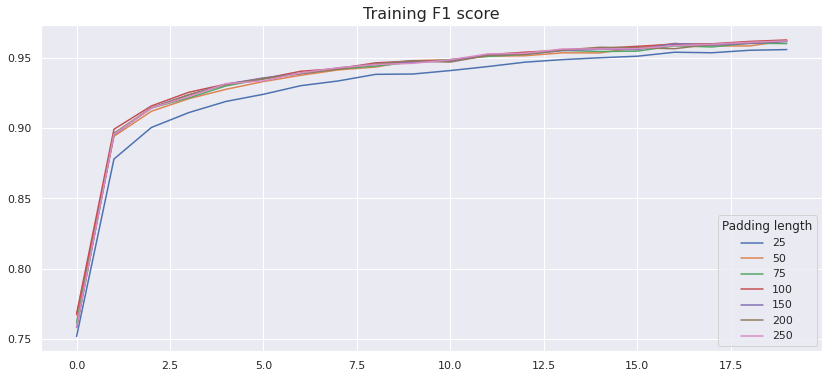

In [10]:
ax = plot_lists([train_metrics_25[:,1], 
                train_metrics_50[:,1],
                train_metrics_75[:,1],
                train_metrics_100[:,1], 
                train_metrics_150[:,1], 
                train_metrics_200[:,1],
                train_metrics_250[:,1]], legend=[25, 50, 75, 100, 150, 200, 250], legend_title="Padding length")
_ = ax.set_title("Training F1 score", fontsize=16)

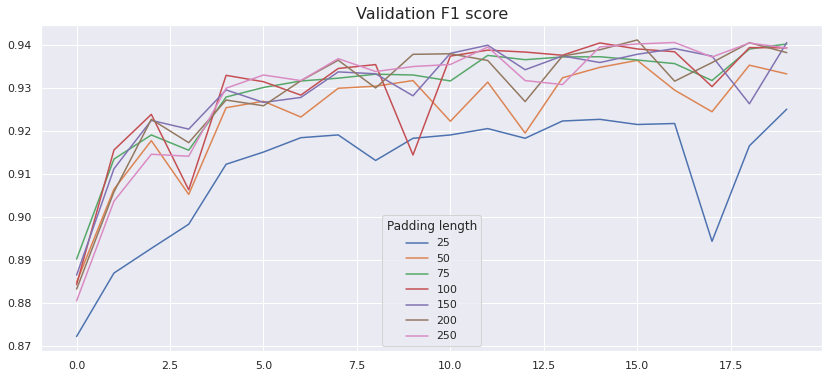

In [11]:
ax = plot_lists([val_metrics_25[:,1], 
                val_metrics_50[:,1],
                val_metrics_75[:,1],
                val_metrics_100[:,1], 
                val_metrics_150[:,1], 
                val_metrics_200[:,1],
                val_metrics_250[:,1]], legend=[25, 50, 75, 100, 150, 200, 250], legend_title="Padding length")
_ = ax.set_title("Validation F1 score", fontsize=16)

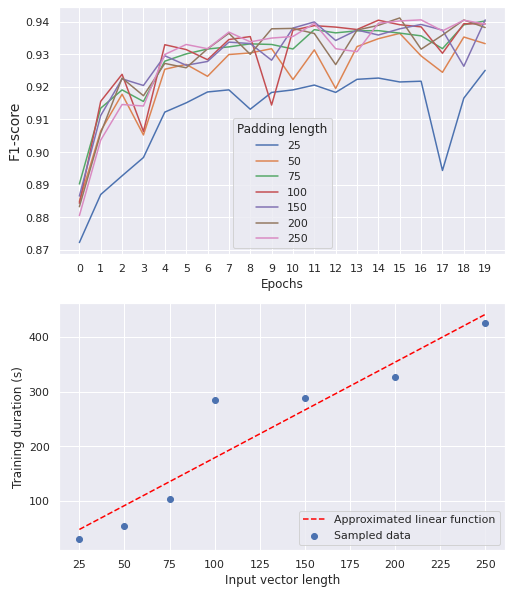

In [12]:
from sklearn.linear_model import LinearRegression

x = df.mean(axis=1).index.to_numpy().reshape(-1,1)
y = df.mean(axis=1).values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x, y)


f, ax = plt.subplots(2,1,figsize=(8,10))

plot_lists([val_metrics_25[:,1], 
                val_metrics_50[:,1],
                val_metrics_75[:,1],
                val_metrics_100[:,1], 
                val_metrics_150[:,1], 
                val_metrics_200[:,1],
                val_metrics_250[:,1]], legend=[25, 50, 75, 100, 150, 200, 250], 
                legend_title="Padding length", ax=ax[0])
ax[0].set_ylabel("F1-score", fontsize=14)
ax[0].set_xlabel("Epochs")
ax[0].set_xticks(range(0, len(val_metrics_25[:,1])))

m = df.mean(axis=1)
ax[1].plot(x, lr.predict(x), color="red", linestyle="dashed")
ax[1].scatter(m.index, m.values)
ax[1].set_ylabel("Training duration (s)")
ax[1].set_xlabel("Input vector length")
ax[1].set_xticks([25, 50, 75, 100, 125, 150, 175, 200, 225, 250])
_ = ax[1].legend(["Approximated linear function", "Sampled data"], loc=4)